In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def integrate_riemann_left( f, a, b, N ):
    
    h = (b-a)/N
    I = 0
    
    for k in range(N):
        x = a + k*h
        I += h * f(x)
    return I

In [7]:
def f1(x):
    return np.sin(x)

In [17]:
a = 0.0
b = np.pi/2
N = 100
exact = 1.0

In [18]:
I1 = integrate_riemann_left( f1, a, b, N )
print( I1, np.abs(I1-exact)/exact )

0.9921254566056334 0.007874543394366551


Slope of log-log plot: -1.0153854615331288


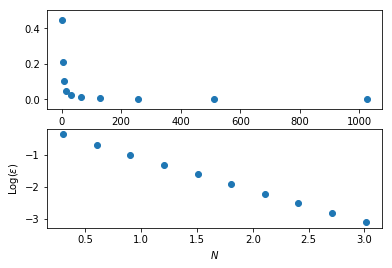

In [39]:
Ns = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
err_list = []

for N in Ns:
    I = integrate_riemann_left( f1, a, b, N )
    err = (I - exact)/exact
    err_list.append(err)

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.scatter( Ns, np.fabs(err_list) )

ax2 = fig.add_subplot(2,1,2)
ax2.scatter( np.log10(Ns), np.log10(np.fabs(err_list)) )
m,c = np.polyfit(np.log10(Ns), np.log10(np.fabs(err_list)) , 1 )
#ax2.plot(np.log10(Ns), np.log10(Ns)*m + c, '--' )
print('Slope of log-log plot:', m)
ax2.set_xlabel(r"$N$")
ax2.set_ylabel('Log($\epsilon$)')
#plt.savefig('left_riem_convergence.png')
plt.show()